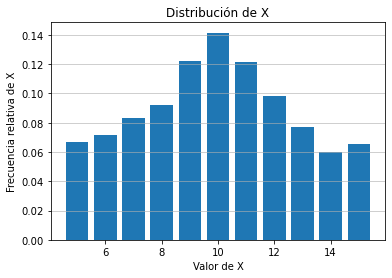

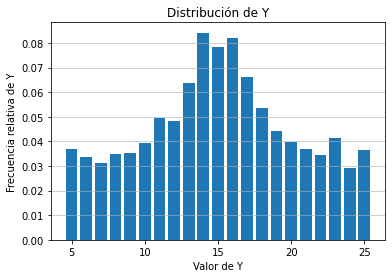

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize

datos = pd.read_csv("xy.csv", index_col=0)
xProb = [n for n in datos.sum(axis=1, numeric_only=True)]
yProb = [n for n in datos.sum(axis=0, numeric_only=True)]
xDom = list(range(5, 16))
yDom = list(range(5, 26))

plt.bar(xDom, xProb)
plt.grid(axis="y", alpha=0.75)
plt.xlabel("Valor de X")
plt.ylabel("Frecuencia relativa de X")
plt.title("Distribución de X")
plt.show()

plt.bar(yDom, yProb)
plt.grid(axis="y", alpha=0.75)
plt.xlabel("Valor de Y")
plt.ylabel("Frecuencia relativa de Y")
plt.title("Distribución de Y")
plt.show()

# La forma de las gráficas ambas se asemejan a una curva gaussiana, se toma un ajuste a una distribución normal

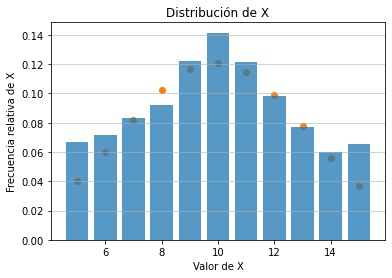

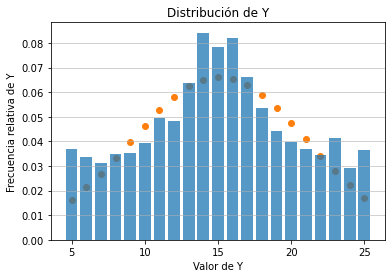

Para X el sigma de ajuste es:  3.2994428756632264  y el mu es:  9.904843809352778
Para Y el sigma de ajuste es:  6.0269377486808775  y el mu es:  15.079460901084733


In [13]:
def gaussian(domain, sigma, mu):
    return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp( (-(domain-mu)**2)/(2*sigma**2) )

paramsX, covX = scipy.optimize.curve_fit(gaussian, xDom, xProb)
paramsY, covY = scipy.optimize.curve_fit(gaussian, yDom, yProb)

xFit = gaussian(xDom, paramsX[0], paramsX[1])
yFit = gaussian(yDom, paramsY[0], paramsY[1])

plt.bar(xDom, xProb, alpha=0.75)
plt.scatter(xDom, xFit)
plt.grid(axis="y", alpha=0.7)
plt.xlabel("Valor de X")
plt.ylabel("Frecuencia relativa de X")
plt.title("Distribución de X")
plt.show()

plt.bar(yDom, yProb, alpha=0.75)
plt.scatter(yDom, yFit)
plt.grid(axis="y", alpha=0.7)
plt.xlabel("Valor de Y")
plt.ylabel("Frecuencia relativa de Y")
plt.title("Distribución de Y")
plt.show()

print("Para X el sigma de ajuste es: ", paramsX[0], " y el mu es: ", paramsX[1])
print("Para Y el sigma de ajuste es: ", paramsY[0], " y el mu es: ", paramsY[1])